In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder containing the CSV files
folder_path = './results/'

# Get a list of all files in the folder that contain '_weakscaling_250000' in their name
files = [file for file in os.listdir(folder_path) if '_weakscaling_250000' in file]

# Create a dictionary to store the results and mean timings for each file
all_results = {}

# Loop through each file, read the data, calculate mean timings, and store them in the dictionary
for file in files:
    # Extract the plot name from the file name
    plot_name = file.split('_results')[0]
    
    # Read the CSV file
    file_path = os.path.join(folder_path, file)
    results = pd.read_csv(file_path, header=None)
    results.columns = ['Rep', 'NP', 'Size', 'Time']

    results = results[results['NP'] > 4]
    
    # Calculate mean timing for each NP group
    mean_results = results.groupby('NP')['Time'].mean().reset_index()
    
    # Store the results in the dictionary
    all_results[plot_name] = mean_results

# Plotting
plt.figure(figsize=(10, 6))

# Loop through the dictionary to plot each set of results and add legend
for plot_name, mean_results in all_results.items():
    plt.plot(mean_results['NP'], mean_results['Time'], marker='o', linestyle='-', label=plot_name)

plt.title('Mean Timing vs NP')
plt.xlabel('Number of Processes (NP)')
plt.ylabel('Mean Timing')
plt.grid(True)
plt.legend()
plt.show()


KeyError: 'NP'

In [16]:
results = pd.read_csv('./results/mpi_gather_results_strongscaling_32.csv', header=None)
results.columns = ['Rep', 'NP', 'Size', 'Time']
print(results.columns, results.shape)
results.head()

Index(['Rep', 'NP', 'Size', 'Time'], dtype='object') (219, 4)


,Rep,NP,Size,Time
0,1,32,256,0.011440
1,2,32,256,0.008502
2,3,32,256,0.011466
3,4,32,256,0.002479
4,5,32,256,0.011958


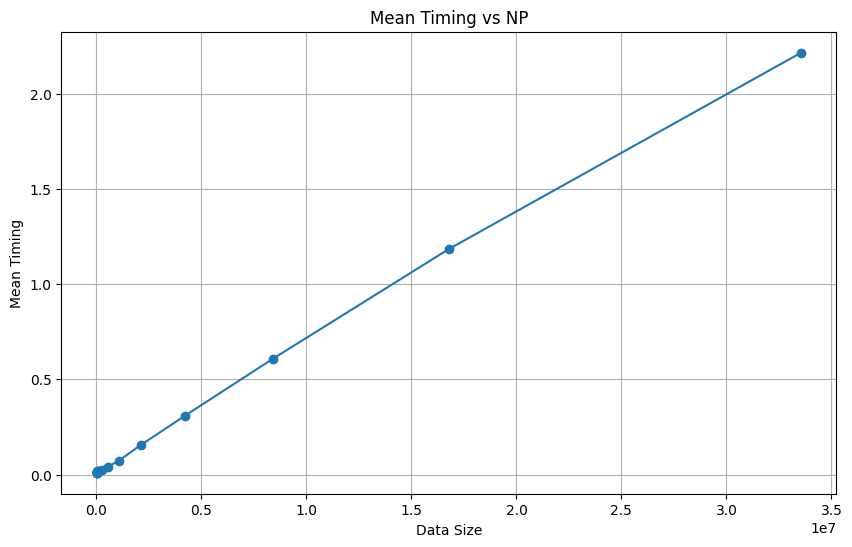

In [19]:
# Calculate mean timing for each NP group
mean_results = results.groupby('Size')['Time'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_results['Size'], mean_results['Time'], marker='o', linestyle='-')
plt.title('Mean Timing vs NP')
plt.xlabel('Data Size')
plt.ylabel('Mean Timing')
plt.grid(True)
plt.show()